In [1]:
using Pkg
Pkg.activate("../")

using Plots

using Revise
using MarkovModels

 Activating environment at `~/GithubRepositories/MarkovModels/Project.toml`
┌ Info: Precompiling MarkovModels [c2ae6250-d0a1-11ea-0991-234599ce5244]
└ @ Base loading.jl:1278


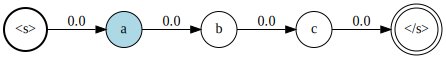

In [115]:
fsm1 = LinearFSM(Label["a", "b", "c"], Dict("a"=>1))
fsm2 = LinearFSM(["a", "d", "c"])
fsm1

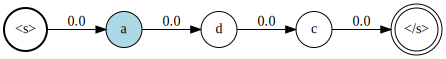

In [100]:
fsm2

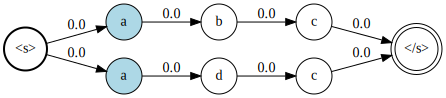

In [101]:
union(fsm1, fsm2)

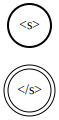

In [12]:
fsm = FSM()

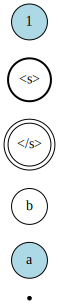

In [13]:
s1 = addstate!(fsm, pdfindex = 1)
s2 = addstate!(fsm, pdfindex = 2, label = "a")
s3 = addstate!(fsm, label = "b")
s4 = addstate!(fsm)

fsm

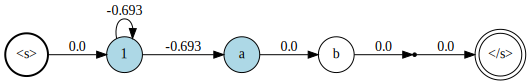

In [14]:
l

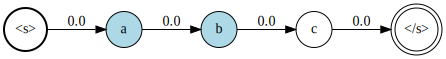

In [15]:
fsm = LinearFSM(["a", "b", "c"], Dict("a" => 1, "b" => 2))

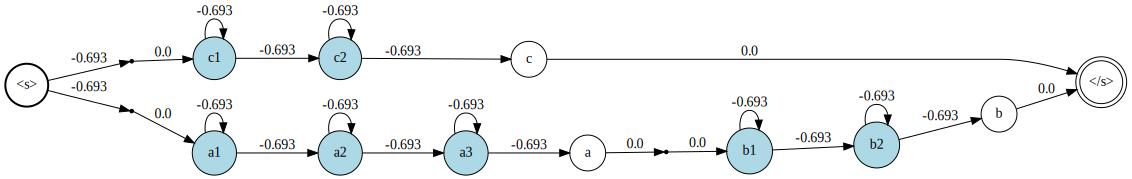

In [110]:
fsm = union(LinearFSM(["a", "b"]), LinearFSM(["c"])) |> weightnormalize!
subfsms = Dict(
    "a" => LinearFSM(["a1", "a2", "a3"], Dict("a1"=>1, "a2"=>2, "a3"=>3)) |> addselfloop!,
    "b" => LinearFSM(["b1", "b2"], Dict("b1"=>4, "b2"=>5)) |> addselfloop!,
    "c" => LinearFSM(["c1", "c2"], Dict("c1"=>6, "c2"=>1)) |> addselfloop! 
)
subfsms["b"]

compose!(fsm, subfsms)

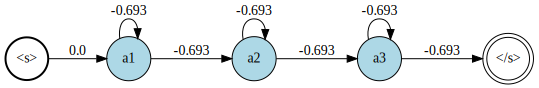

In [106]:
subfsms["a"]

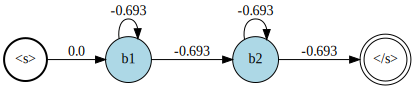

In [107]:
subfsms["b"]

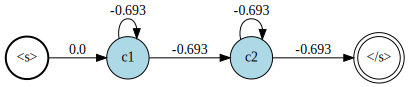

In [108]:
subfsms["c"]

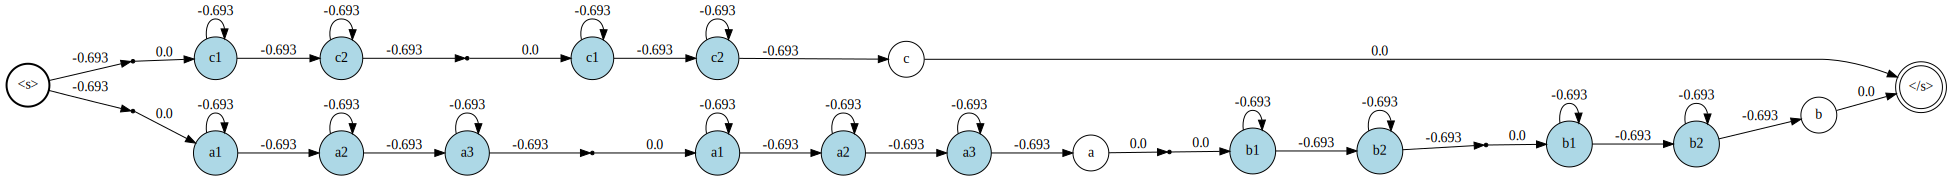

In [112]:
fsm ∘ subfsms

In [17]:
for l in parents(fsm, fsm.states[2])
    println(l)
end

for l in children(fsm, fsm.states[initstateid])
    println(l)
end

Link{Float64}(State(2, label = a), State(initstateid), -0.6931471805599453)
Link{Float64}(State(initstateid), State(2, label = a), -0.6931471805599453)
Link{Float64}(State(initstateid), State(3, label = c), -0.6931471805599453)


In [73]:
fsm.backwardlinks

Dict{Union{MarkovModels.FinalStateID, MarkovModels.InitStateID, Int64},Array{Link,1}} with 4 entries:
  2            => Link[Link{Float64}(State(2, label = a), State(initstateid), 0…
  finalstateid => Link[Link{Float64}(State(finalstateid), State(1, label = b), …
  3            => Link[Link{Float64}(State(3, label = c), State(initstateid), 0…
  1            => Link[Link{Float64}(State(1, label = b), State(2, label = a), …

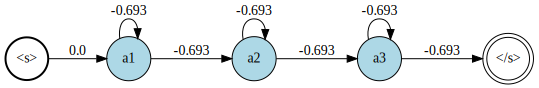

In [58]:
subfsms["a"]

Link{Float64}[Link{Float64}(State(2, label = a), State(initstateid), 0.0)]
Link{Float64}[Link{Float64}(State(2, label = a), State(1, label = b), 0.0)]


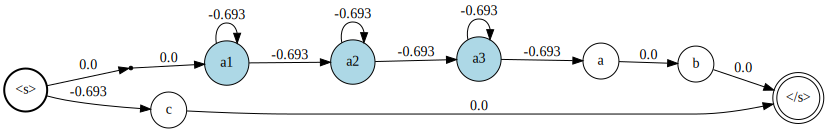

In [59]:
replace!(fsm, fsm.states[2], subfsms["a"])

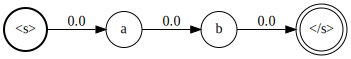

In [40]:
fsm1 = LinearFSM(["a", "b"])
fsm2 = LinearFSM(["c", "d"])
fsm3 = LinearFSM(["e"])
fsm1

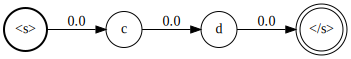

In [38]:
fsm2

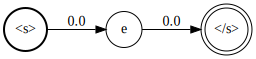

In [42]:
fsm3

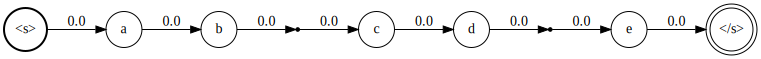

In [41]:
concat(fsm1, fsm2, fsm3)

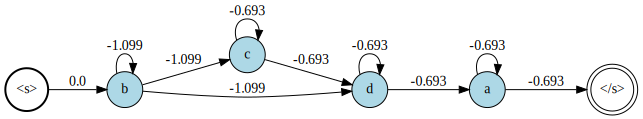

In [149]:
fsm = FSM()


s2 = addstate!(fsm, pdfindex = 2, label = "b")
s3 = addstate!(fsm, pdfindex = 3, label = "c")
s4 = addstate!(fsm, pdfindex = 4, label = "d")
s5 = addstate!(fsm, pdfindex = 1, label = "a")

link!(fsm, initstate(fsm), s1)

# Self-loops
link!(fsm, s1, s1, log(1/2))
link!(fsm, s2, s2, log(1/2))
link!(fsm, s3, s3, log(1/2))
link!(fsm, s4, s4, log(1/2))
link!(fsm, s5, s5, log(1/2))

link!(fsm, s1, s2, log(1/4))
link!(fsm, s1, s3, log(1/4))
link!(fsm, s2, s4, log(1/2))
link!(fsm, s3, s4, log(1/2))
link!(fsm, s4, s5, log(1/2))
link!(fsm, s5, finalstate(fsm), log(1/2))

fsm |> determinize! |> weightnormalize!

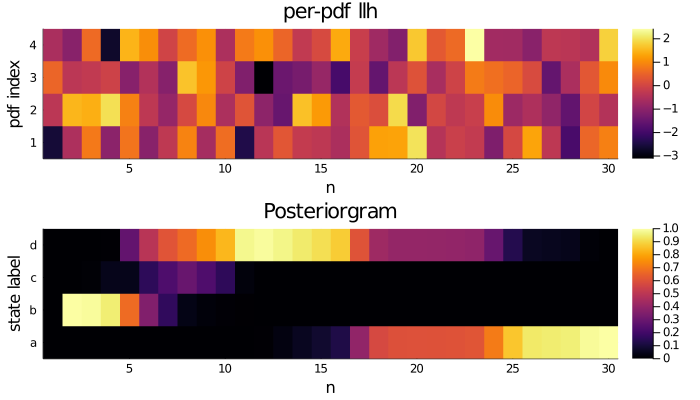

In [150]:
# We have 4 different pdfs 
S = 4

# Fake per-pdf log-likelihood
N = 30
llhs = randn(S, N) 

lnαβ, totllh = αβrecursion(fsm, llhs)
γ = resps(fsm, lnαβ, dense = true)

plot_llhs = heatmap(
    llhs, 
    title = "per-pdf llh", 
    size = (600, 200),
    ylabel = "pdf index",
    xlabel = "n"
)
plot_posts = heatmap(
    γ, 
    title = "Posteriorgram",
    size = (700, 250),
    yticks = (1:4, ["a", "b", "c", "d"]),
    xlabel = "n",
    ylabel = "state label"
)
plot(plot_llhs, plot_posts, layout = (2, 1), size = (700, 400))